In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plot_utils import plot_event_history

In [11]:
# evolution_log = pd.read_csv("evolution_log.csv")
event_history = pd.read_csv("event_history.csv").dropna().sort_values(by="event")
price_matrix = pd.read_csv("price_matrix.csv")
pso_log = pd.read_csv("pso_log.csv")

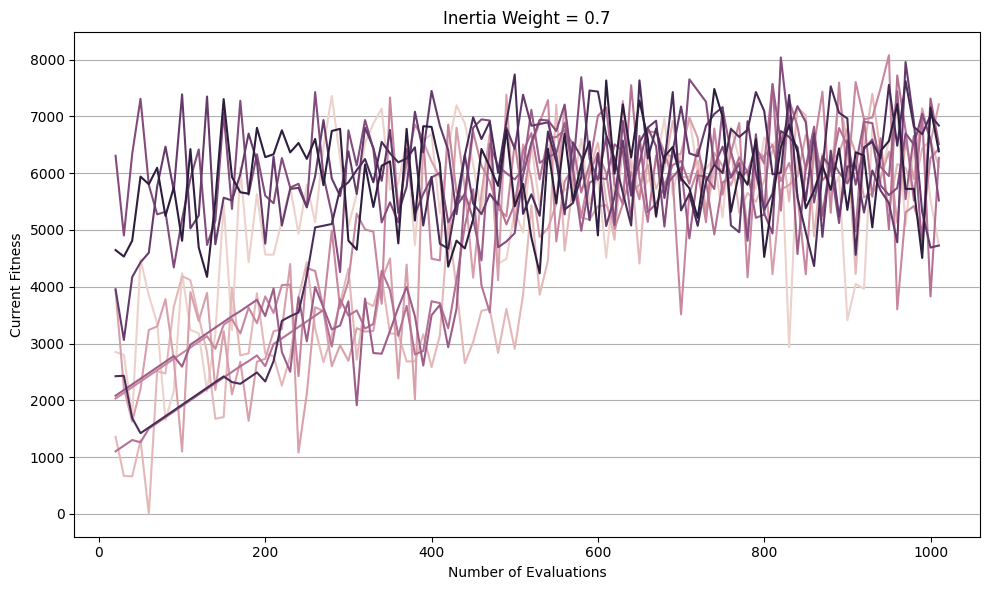

In [12]:
# Modify the subplots to share the y-axis
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=pso_log,
    x="num_evals",
    y="current_fitness",
    hue="particle_id",
    ax=ax,
    # palette=sns.color_palette("tab10"),
)
ax.legend().set_visible(False)

ax.set_title("Inertia Weight = 0.7")

# Only show y-axis label on the left plot
ax.set_ylabel("Current Fitness")

ax.set_xlabel("Number of Evaluations")
ax.grid(axis="y")

plt.tight_layout()

## PSO

/tmp/ipykernel_63200/3302307251.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend().set_visible(False)


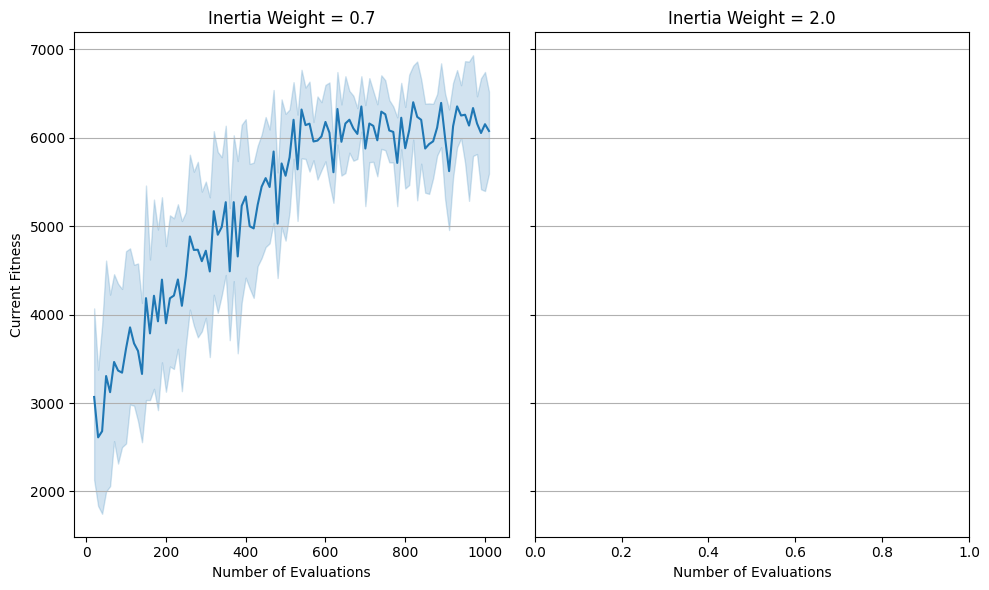

In [3]:
# Modify the subplots to share the y-axis
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.lineplot(
    data=pso_log.loc[pso_log.inertia_weight == 0.7],
    x="num_evals",
    y="current_fitness",
    hue="run_id",
    ax=ax[0],
    # palette=sns.color_palette("tab10"),
)
sns.lineplot(
    data=pso_log.loc[pso_log.inertia_weight == 2],
    x="num_evals",
    y="current_fitness",
    hue="run_id",
    ax=ax[1],
    # palette=sns.color_palette("tab10"),
)
# ax.set_title("PSO Fitness Evolution")
ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)

# Add titles to differentiate the plots
ax[0].set_title("Inertia Weight = 0.7")
ax[1].set_title("Inertia Weight = 2.0")

# Only show y-axis label on the left plot
ax[1].set_ylabel("")
ax[0].set_ylabel("Current Fitness")

ax[0].set_xlabel("Number of Evaluations")
ax[1].set_xlabel("Number of Evaluations")
ax[0].grid(axis="y")
ax[1].grid(axis="y")

plt.tight_layout()

In [ ]:
pso_log

,run_id,num_evals,particle_id,current_fitness,best_fitness,swarm_size,inertia_weight,cognitive_coefficient,social_coefficient
0,0,20,0,2850,5220,10,0.7,1.5,1.5
1,0,20,1,1356,1376,10,0.7,1.5,1.5
2,0,20,2,3934,4004,10,0.7,1.5,1.5
3,0,20,3,2030,2030,10,0.7,1.5,1.5
4,0,20,4,1100,1100,10,0.7,1.5,1.5
...,...,...,...,...,...,...,...,...,...
995,0,1010,5,6513,7572,10,0.7,1.5,1.5
996,0,1010,6,5520,8040,10,0.7,1.5,1.5
997,0,1010,7,4726,7959,10,0.7,1.5,1.5
998,0,1010,8,6840,7738,10,0.7,1.5,1.5
